In [ ]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


# Iris Species Classification 
We have to classify iris plants of three species

About Dataset: From Kaggle

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species 

In [7]:
data = pd.read_csv("Iris.csv")


In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# Data visualization

In [11]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

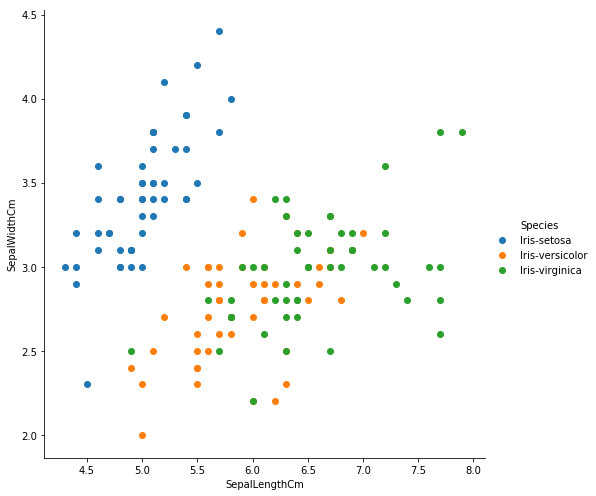

In [12]:
# Relationship between sepal length and sepal width
sns.FacetGrid(data, hue="Species", height = 7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()


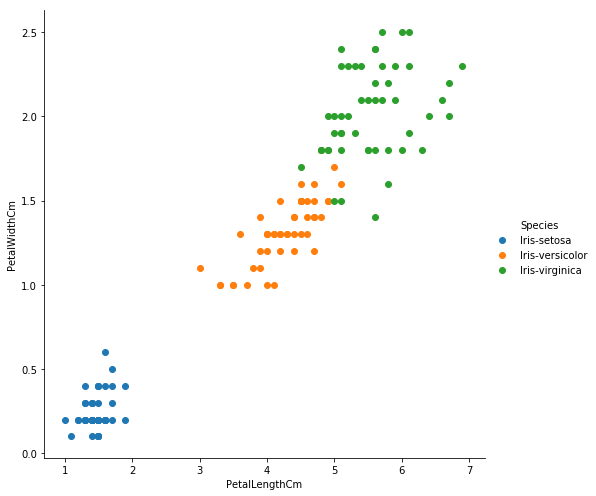

In [13]:
# Relationship between petal length and petal width
sns.FacetGrid(data, hue="Species", height = 7)\
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()


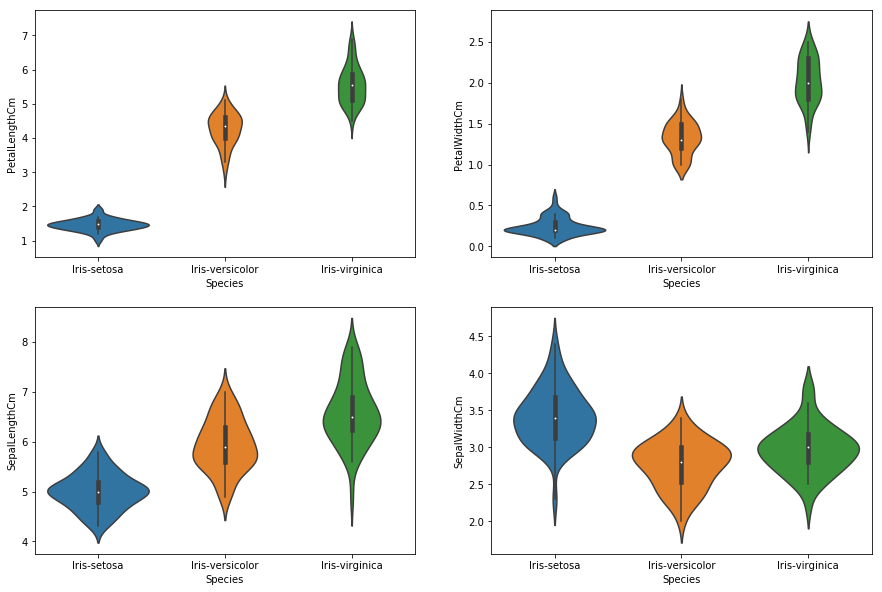

In [14]:
# Denser regions of the data are fatter, and sparser are thiner
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)


# Feature Engineering
In the following features data are scattered in different values(sizes). Let's catagorize them as:

small = 0
medium = 1
large = 2


In [15]:
dataset = [data]


In [16]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Sepal Length

In [17]:
data['SepalLengthCm'].describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [18]:
data['CategoricalSepalLengthCm'] = pd.cut(data['SepalLengthCm'], 3)
print(data['CategoricalSepalLengthCm'])


0      (4.296, 5.5]
1      (4.296, 5.5]
2      (4.296, 5.5]
3      (4.296, 5.5]
4      (4.296, 5.5]
5      (4.296, 5.5]
6      (4.296, 5.5]
7      (4.296, 5.5]
8      (4.296, 5.5]
9      (4.296, 5.5]
10     (4.296, 5.5]
11     (4.296, 5.5]
12     (4.296, 5.5]
13     (4.296, 5.5]
14       (5.5, 6.7]
15       (5.5, 6.7]
16     (4.296, 5.5]
17     (4.296, 5.5]
18       (5.5, 6.7]
19     (4.296, 5.5]
20     (4.296, 5.5]
21     (4.296, 5.5]
22     (4.296, 5.5]
23     (4.296, 5.5]
24     (4.296, 5.5]
25     (4.296, 5.5]
26     (4.296, 5.5]
27     (4.296, 5.5]
28     (4.296, 5.5]
29     (4.296, 5.5]
           ...     
120      (6.7, 7.9]
121      (5.5, 6.7]
122      (6.7, 7.9]
123      (5.5, 6.7]
124      (5.5, 6.7]
125      (6.7, 7.9]
126      (5.5, 6.7]
127      (5.5, 6.7]
128      (5.5, 6.7]
129      (6.7, 7.9]
130      (6.7, 7.9]
131      (6.7, 7.9]
132      (5.5, 6.7]
133      (5.5, 6.7]
134      (5.5, 6.7]
135      (6.7, 7.9]
136      (5.5, 6.7]
137      (5.5, 6.7]
138      (5.5, 6.7]


In [19]:
for _data in dataset:
    _data.loc[_data['SepalLengthCm']<=5.5, 'SepalLengthCm'] = 0
    _data.loc[(_data['SepalLengthCm'] > 5.5) & (data['SepalLengthCm'] <= 6.7), 'SepalLengthCm'] = 1
    _data.loc[_data['SepalLengthCm']>6.7, 'SepalLengthCm'] = 2

# Sepal Width

In [20]:
data['SepalWidthCm'].describe()


count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [21]:
data['CategoricalSepalWidthCm'] = pd.cut(data['SepalWidthCm'], 3)
print(data['CategoricalSepalWidthCm'])


0        (2.8, 3.6]
1        (2.8, 3.6]
2        (2.8, 3.6]
3        (2.8, 3.6]
4        (2.8, 3.6]
5        (3.6, 4.4]
6        (2.8, 3.6]
7        (2.8, 3.6]
8        (2.8, 3.6]
9        (2.8, 3.6]
10       (3.6, 4.4]
11       (2.8, 3.6]
12       (2.8, 3.6]
13       (2.8, 3.6]
14       (3.6, 4.4]
15       (3.6, 4.4]
16       (3.6, 4.4]
17       (2.8, 3.6]
18       (3.6, 4.4]
19       (3.6, 4.4]
20       (2.8, 3.6]
21       (3.6, 4.4]
22       (2.8, 3.6]
23       (2.8, 3.6]
24       (2.8, 3.6]
25       (2.8, 3.6]
26       (2.8, 3.6]
27       (2.8, 3.6]
28       (2.8, 3.6]
29       (2.8, 3.6]
           ...     
120      (2.8, 3.6]
121    (1.998, 2.8]
122    (1.998, 2.8]
123    (1.998, 2.8]
124      (2.8, 3.6]
125      (2.8, 3.6]
126    (1.998, 2.8]
127      (2.8, 3.6]
128    (1.998, 2.8]
129      (2.8, 3.6]
130    (1.998, 2.8]
131      (3.6, 4.4]
132    (1.998, 2.8]
133    (1.998, 2.8]
134    (1.998, 2.8]
135      (2.8, 3.6]
136      (2.8, 3.6]
137      (2.8, 3.6]
138      (2.8, 3.6]


In [22]:
for _data in dataset:
    _data.loc[_data['SepalWidthCm']<=2.8, 'SepalWidthCm'] = 0
    _data.loc[(_data['SepalWidthCm'] > 2.8) & (data['SepalWidthCm'] <= 3.6), 'SepalWidthCm'] = 1
    _data.loc[_data['SepalWidthCm']>3.6, 'SepalWidthCm'] = 2


# Petal Length

In [23]:
data['PetalLengthCm'].describe()


count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

In [24]:
data['CategoricalPetalLengthCm'] = pd.cut(data['PetalLengthCm'], 3)
print(data['CategoricalPetalLengthCm'])


0      (0.994, 2.967]
1      (0.994, 2.967]
2      (0.994, 2.967]
3      (0.994, 2.967]
4      (0.994, 2.967]
5      (0.994, 2.967]
6      (0.994, 2.967]
7      (0.994, 2.967]
8      (0.994, 2.967]
9      (0.994, 2.967]
10     (0.994, 2.967]
11     (0.994, 2.967]
12     (0.994, 2.967]
13     (0.994, 2.967]
14     (0.994, 2.967]
15     (0.994, 2.967]
16     (0.994, 2.967]
17     (0.994, 2.967]
18     (0.994, 2.967]
19     (0.994, 2.967]
20     (0.994, 2.967]
21     (0.994, 2.967]
22     (0.994, 2.967]
23     (0.994, 2.967]
24     (0.994, 2.967]
25     (0.994, 2.967]
26     (0.994, 2.967]
27     (0.994, 2.967]
28     (0.994, 2.967]
29     (0.994, 2.967]
            ...      
120      (4.933, 6.9]
121    (2.967, 4.933]
122      (4.933, 6.9]
123    (2.967, 4.933]
124      (4.933, 6.9]
125      (4.933, 6.9]
126    (2.967, 4.933]
127    (2.967, 4.933]
128      (4.933, 6.9]
129      (4.933, 6.9]
130      (4.933, 6.9]
131      (4.933, 6.9]
132      (4.933, 6.9]
133      (4.933, 6.9]
134      (

In [25]:
for _data in dataset:
    _data.loc[_data['PetalLengthCm']<=2.967, 'PetalLengthCm'] = 0
    _data.loc[(_data['PetalLengthCm'] > 2.967) & (data['PetalLengthCm'] <= 4.933), 'PetalLengthCm'] = 1
    _data.loc[_data['PetalLengthCm']>4.933, 'PetalLengthCm'] = 2


# Petal Width

In [26]:
data['PetalWidthCm'].describe()


count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

In [27]:
data['CategoricalPetalWidthCm'] = pd.cut(data['PetalWidthCm'], 3)
print(data['CategoricalPetalWidthCm'])


0      (0.0976, 0.9]
1      (0.0976, 0.9]
2      (0.0976, 0.9]
3      (0.0976, 0.9]
4      (0.0976, 0.9]
5      (0.0976, 0.9]
6      (0.0976, 0.9]
7      (0.0976, 0.9]
8      (0.0976, 0.9]
9      (0.0976, 0.9]
10     (0.0976, 0.9]
11     (0.0976, 0.9]
12     (0.0976, 0.9]
13     (0.0976, 0.9]
14     (0.0976, 0.9]
15     (0.0976, 0.9]
16     (0.0976, 0.9]
17     (0.0976, 0.9]
18     (0.0976, 0.9]
19     (0.0976, 0.9]
20     (0.0976, 0.9]
21     (0.0976, 0.9]
22     (0.0976, 0.9]
23     (0.0976, 0.9]
24     (0.0976, 0.9]
25     (0.0976, 0.9]
26     (0.0976, 0.9]
27     (0.0976, 0.9]
28     (0.0976, 0.9]
29     (0.0976, 0.9]
           ...      
120       (1.7, 2.5]
121       (1.7, 2.5]
122       (1.7, 2.5]
123       (1.7, 2.5]
124       (1.7, 2.5]
125       (1.7, 2.5]
126       (1.7, 2.5]
127       (1.7, 2.5]
128       (1.7, 2.5]
129       (0.9, 1.7]
130       (1.7, 2.5]
131       (1.7, 2.5]
132       (1.7, 2.5]
133       (0.9, 1.7]
134       (0.9, 1.7]
135       (1.7, 2.5]
136       (1.

In [28]:
for _data in dataset:
    _data.loc[_data['PetalWidthCm']<=0.9, 'PetalWidthCm'] = 0
    _data.loc[(_data['PetalWidthCm'] > 0.9) & (data['PetalWidthCm'] <= 1.7), 'PetalWidthCm'] = 1
    _data.loc[_data['PetalWidthCm']>1.7, 'PetalWidthCm'] = 2


# Dropping Unnecesssary Columns

In [29]:
features_drop = ['CategoricalSepalLengthCm', 'CategoricalSepalWidthCm', 'CategoricalPetalLengthCm', 'CategoricalPetalWidthCm']
data = data.drop(features_drop, axis = 1)


In [30]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.0,1.0,0.0,0.0,Iris-setosa
1,2,0.0,1.0,0.0,0.0,Iris-setosa
2,3,0.0,1.0,0.0,0.0,Iris-setosa
3,4,0.0,1.0,0.0,0.0,Iris-setosa
4,5,0.0,1.0,0.0,0.0,Iris-setosa


# Classification

In [31]:
data.drop('Id',axis=1,inplace=True) 
#dropping the Id column
#axis = 1 specifies that it should be column wise, 
#inplace = 1 means the changes should be reflected into the dataframe


In [32]:
# We will be using K Fold Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=15, shuffle = True, random_state = 42)


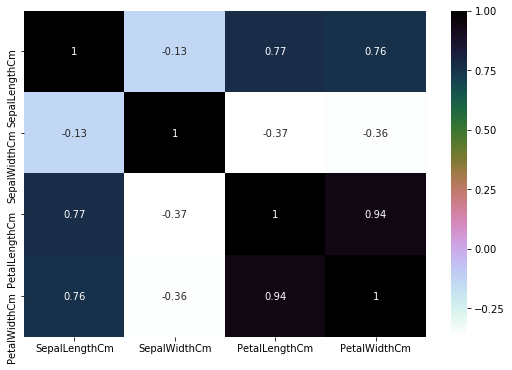

In [33]:
plt.figure(figsize=(9,6)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()


# Observation:
Petal length and width is highly correlated(0.94). So we will use only one of them. Let's use width.
On the other hand Sepal length and width are negatively correlated(-0.13). We can use both of them.


In [34]:
data.drop('PetalLengthCm',axis=1,inplace=True)


In [35]:
train = data.drop('Species', axis = 1)
target = data['Species']
train.shape, target.shape


((150, 3), (150,))

# Decision Tree 

In [37]:
# Decision Tree
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)


[1.  1.  1.  1.  0.9 1.  1.  1.  0.9 0.8 1.  1.  1.  0.9 0.9]


In [38]:
#decision tree score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')


Average accuracy:  96.0 %
Minimum accuracy:  80.0 %
Maximum accuracy:  100.0 %


# Random Forest

In [39]:
# Random Forest
clf = RandomForestClassifier()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)


[1.  1.  1.  1.  0.9 1.  1.  1.  0.9 0.8 1.  1.  0.9 0.9 0.9]


In [40]:
# random forest score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')


Average accuracy:  95.33 %
Minimum accuracy:  80.0 %
Maximum accuracy:  100.0 %


# SVM

In [41]:
# SVM
clf = SVC()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 3, scoring = 'accuracy')
print(score)


[1.  1.  1.  1.  0.9 1.  1.  1.  0.9 0.8 1.  1.  1.  0.9 0.9]


In [42]:
# svm score
print("Average accuracy: ", round(np.mean(score)*100, 2), '%')
print("Minimum accuracy: ", np.min(score)*100, '%')
print("Maximum accuracy: ", np.max(score)*100, '%')


Average accuracy:  96.0 %
Minimum accuracy:  80.0 %
Maximum accuracy:  100.0 %
